In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, 
    median_absolute_error, explained_variance_score, r2_score
)
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# Input file containing data
input_file = '../aiwp-data/data_singlevar_regr.txt'
# Load the data from the input file
data = np.loadtxt(input_file, delimiter=',')

In [16]:
X, y = data[:, :-1], data[:, -1]

# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train, y_train = X[:num_training], y[:num_training]

# Test data
X_test, y_test = X[num_training:], y[num_training:]

In [17]:
# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = regressor.predict(X_test)

In [18]:
X_test.shape, y_test.shape

((12, 1), (12,))

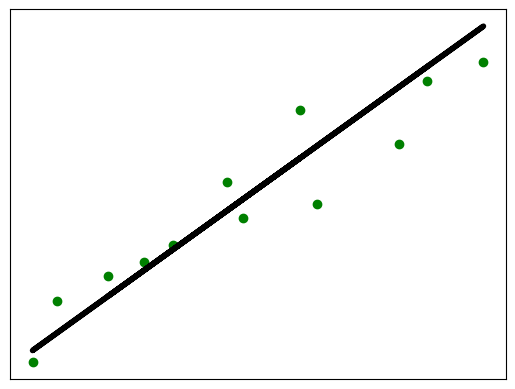

In [19]:
# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [20]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [21]:
# Model persistence
output_model_file = '../aiwp-models/model.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [22]:
# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(mean_absolute_error(y_test, y_test_pred_new), 2))


New mean absolute error = 0.59


In [23]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
# boston = load_boston()

with open('../aiwp-data/boston_oml.pkl', 'rb') as bunch:
    boston = pickle.load(bunch)

X = boston.data  # Features (input variables)
y = boston.target  # Target variable (housing prices)

type(X), X.shape, y.shape

(pandas.core.frame.DataFrame, (506, 13), (506,))

In [24]:
X = X.to_numpy()
y = y.to_numpy()

In [25]:
from sklearn import preprocessing

# Sample input labels
input_labels = ['P', 'N']

# Create label encoder and fit the labels
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)
y = encoder.transform(y)

In [26]:
# Select one feature (e.g., average number of rooms per dwelling)
X_rooms = X[:, np.newaxis, 5]

# # Select the feature "average number of rooms per dwelling"
# X_rooms = X[:, 5]

# # Reshape X_rooms to have a single column
# X_rooms = X_rooms.reshape(-1, 1)

X_rooms.shape

(506, 1)

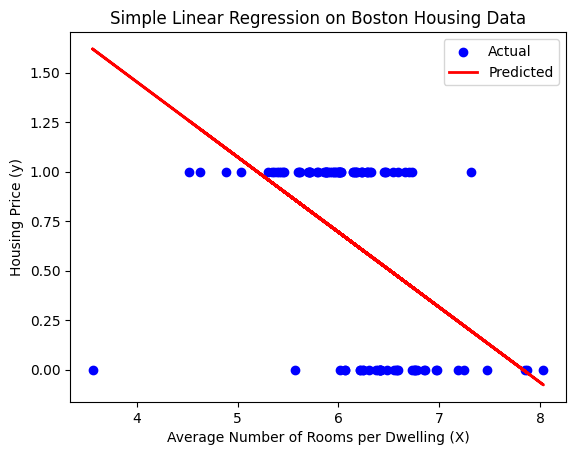

Mean Squared Error: 0.18


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)

# Plot the data and regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average Number of Rooms per Dwelling (X)')
plt.ylabel('Housing Price (y)')
plt.legend()
plt.title('Simple Linear Regression on Boston Housing Data')
plt.show()

print(f"Mean Squared Error: {mse:.2f}")